In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


#Calidad_del_Aire_Municipio_de_Duitama_20240302
df = pd.read_csv("calidad_aire.csv")
'''
# Steps
1. Get data
2. Explore and visualize the data
3. Prepare data for lachine learning (cleaning or transforming)
4. Select and train a model
5. Fine tune the model
6. Launch, monitor and mantain
'''

2024-05-15 17:27:29.223445: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 17:27:32.008597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'\n# Steps\n1. Get data\n2. Explore and visualize the data\n3. Prepare data for lachine learning (cleaning or transforming)\n4. Select and train a model\n5. Fine tune the model\n6. Launch, monitor and mantain\n'

In [2]:
# Separete training and test sets

# Remove AQ equipment
df_filtered = df[df['Nombre Equipo'] != 'AQ_SEP']
df_filtered = df_filtered.drop(columns=["Fecha", "Nombre Equipo"])


from scipy.stats import zscore

# Removing outliers

# Identify outliers using Z-score


# Calculate Z-scores
z_scores = np.abs(zscore(df_filtered))

# Identify outliers
outliers = (z_scores > 4).any(axis=1)
print(f"Outliers Detected: {outliers.sum()}")


df_filtered = df_filtered[~outliers]

# Re-check statistics after removing outliers
print("Summary Statistics after Removing Outliers:")
print(df_filtered.describe())



Outliers Detected: 118
Summary Statistics after Removing Outliers:
                 co           co2          pm10         pm2_5           pm5  \
count  27460.000000  27460.000000  27460.000000  27460.000000  27460.000000   
mean      15.455244    478.753132     17.819483     14.364348      9.262527   
std        8.649880     46.688754     16.945172     13.834540     10.340354   
min        1.000000    400.000000      0.000000      0.000000      0.000000   
25%        8.000000    440.000000      7.000000      6.000000      4.000000   
50%       15.000000    475.000000     12.000000     10.000000      6.000000   
75%       23.000000    515.000000     23.000000     18.000000     11.000000   
max       30.000000    626.000000    165.000000    159.000000    131.000000   

       Humedad Relativa   Temperatura  
count      27460.000000  27460.000000  
mean          50.210543     13.401275  
std           25.259347      7.505349  
min            0.000000     -2.500000  
25%           38.6000

In [3]:
train_set, test_set = train_test_split(df_filtered, test_size=0.2, random_state=42)


#print(train_set.head(5))
print(train_set.max())
print("mean")
print(train_set["pm2_5"].mean())
print("\n statistics")
print(train_set.describe())

co                    30.0
co2                 1205.0
pm10                1792.0
pm2_5               3584.0
pm5                 3072.0
Humedad Relativa      88.0
Temperatura           30.6
dtype: float64
mean
15.866285921493972

 statistics
                 co           co2          pm10         pm2_5           pm5  \
count  22062.000000  22062.000000  22062.000000  22062.000000  22062.000000   
mean      15.431828    478.812755     19.138972     15.866286     10.355770   
std        8.649842     47.085134     32.054849     43.784155     35.065509   
min        1.000000    400.000000      0.000000      0.000000      0.000000   
25%        8.000000    440.000000      7.000000      6.000000      4.000000   
50%       15.000000    475.000000     12.000000     10.000000      6.000000   
75%       23.000000    515.000000     23.000000     18.000000     11.000000   
max       30.000000   1205.000000   1792.000000   3584.000000   3072.000000   

       Humedad Relativa   Temperatura  
count  

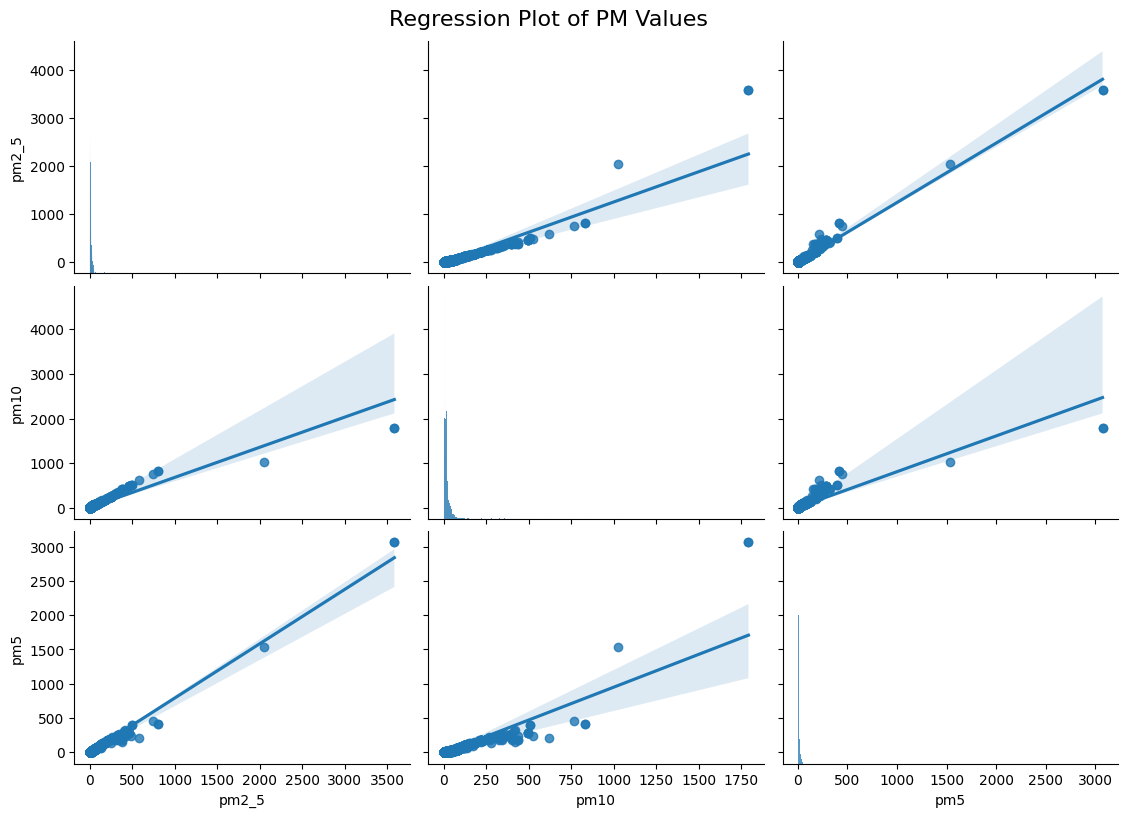

In [5]:
import seaborn as sns

# Assuming 'data' is your DataFrame and it contains 'pm2_5', 'pm10', and 'pm5' columns
# Let's create a smaller DataFrame with just the PM columns for clarity in visualization
pm_data = train_set[['pm2_5', 'pm10', 'pm5']]

# Pair plot with regression lines
sns.pairplot(pm_data, kind='reg')

# Adjust the overall figure size
plt.gcf().set_size_inches(12, 8)

# Add a main title
plt.suptitle('Regression Plot of PM Values', size=16, y=1.02)

# Show the plot
plt.show()

In [6]:
# Separate features and target
X = df_filtered.drop(columns=["pm10"])
y = df_filtered["pm10"]

# Convert boolean columns to float
X = X * 1.0  # Converts True/False to 1.0/0.0

# Ensure all data is numeric and handle NaN values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values in X and align y accordingly
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Check shapes of the data
print("Shapes of datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of datasets:
X_train shape: (22062, 6)
y_train shape: (22062,)
X_test shape: (5516, 6)
y_test shape: (5516,)


# Create models

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming X and y are already defined from the previous splitting process

# Define the preprocessing pipeline
preprocessing = MinMaxScaler()

# Create the linear regression pipeline
model1 = make_pipeline(preprocessing, LinearRegression())

# Train the linear regression model
model1.fit(X_train, y_train)

# Predict with a new pm2_5 value
pm2_5_input = 10

# Create a DataFrame with the same structure as X_train
# Assuming X_train.columns contains all feature names
input_data = pd.DataFrame(columns=X_train.columns)

# Fill the DataFrame with the new pm2_5 value and default values for other features
input_data.loc[0] = 0  # Fill all features with 0 initially
input_data['pm2_5'] = pm2_5_input  # Set the pm2_5 value

# Ensure the new input data undergoes the same preprocessing
input_data_transformed = model1.named_steps['minmaxscaler'].transform(input_data)

# Predict using the trained model
pm10_prediction = model1.named_steps['linearregression'].predict(input_data_transformed)
print(f"Predicted PM10 for PM2.5 value {pm2_5_input}: {pm10_prediction[0]}")


Predicted PM10 for PM2.5 value 10: 24.888187870111416


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from the previous splitting process

# Define the preprocessing pipeline
preprocessing = MinMaxScaler()

# Create the decision tree regression pipeline
model2 = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# Train the decision tree regression model
history2 = model2.fit(X_train, y_train)

# Predict with a new pm2_5 value
pm2_5_input = 10

# Create a DataFrame with the same structure as X_train
# Assuming X_train.columns contains all feature names
input_data = pd.DataFrame(columns=X_train.columns)

# Fill the DataFrame with the new pm2_5 value and default values for other features
input_data.loc[0] = 0  # Fill all features with 0 initially
input_data['pm2_5'] = pm2_5_input  # Set the pm2_5 value

# Ensure the new input data undergoes the same preprocessing
input_data_transformed = model2.named_steps['minmaxscaler'].transform(input_data)

# Predict using the trained model
pm10_prediction = model2.named_steps['decisiontreeregressor'].predict(input_data_transformed)
print(f"Predicted PM10 for PM2.5 value {pm2_5_input}: {pm10_prediction[0]}")


Predicted PM10 for PM2.5 value 10: 19.0


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Create the random forest regression pipeline
model3 = RandomForestRegressor(random_state=42)

# Train the random forest regression model
history3 = model3.fit(X_train, y_train)

# Predict with a new pm2_5 value
pm2_5_input = 10

# Create a DataFrame with the same structure as X_train before normalization
# Assuming X.columns contains all feature names
input_data = pd.DataFrame(columns=X.columns)

# Fill the DataFrame with the new pm2_5 value and default values for other features
input_data.loc[0] = 0  # Fill all features with 0 initially
input_data['pm2_5'] = pm2_5_input  # Set the pm2_5 value

# Ensure the new input data undergoes the same normalization
input_data_transformed = scaler.transform(input_data)

# Predict using the trained model
pm10_prediction = model3.predict(input_data_transformed)
print(f"Predicted PM10 for PM2.5 value {pm2_5_input}: {pm10_prediction[0]}")


Predicted PM10 for PM2.5 value 10: 0.81


/media/flan/Bodega2T/CodeProjects/PracticeData/Statistics and Machine Learning/.mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

model4 = Sequential([Dense(units=1, activation='linear',
                           input_shape=[len(X.columns)])])

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(), metrics = ['mae'])

early_stop=EarlyStopping(monitor='loss', patience=10)
history4 = model4.fit(X_train,y_train, epochs=500, callbacks=[early_stop])

Epoch 1/500


/media/flan/Bodega2T/CodeProjects/PracticeData/Statistics and Machine Learning/.mlenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-15 17:28:10.766561: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1155.2711 - mae: 1155.2697
Epoch 2/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1152.0847 - mae: 1152.0842
Epoch 3/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - loss: 1161.7498 - mae: 1161.7505
Epoch 4/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1166.2937 - mae: 1166.2926
Epoch 5/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1160.3993 - mae: 1160.4001
Epoch 6/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1168.1418 - mae: 1168.1427
Epoch 7/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1168.7882 - mae: 1168.7872
Epoch 8/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1162.3503 - mae: 1162.3502  
Epoch 9/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1165.3197 - mae: 1165.3217
Epoch 10/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1165.8573 - mae: 1165.8571
Epoch 11/500
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 1160.6029 - mae: 1160.6010
Epoch 12/500
690/690 ━━━━━━━━━━━━━━━

In [12]:
model5 = Sequential([
    Dense(units=64, activation='relu',
          input_shape=[len(X.columns)]),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model5.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(), metrics = ['mae'])

early_stop = EarlyStopping(monitor="loss", patience=10)

history5 = model5.fit(X_train,y_train, epochs=1000, callbacks=[early_stop])



Epoch 1/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 92.8215 - mae: 92.8216
Epoch 2/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.6507 - mae: 12.6507
Epoch 3/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.2256 - mae: 12.2256
Epoch 4/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.3896 - mae: 12.3896
Epoch 5/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.7557 - mae: 12.7557
Epoch 6/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.1653 - mae: 12.1653
Epoch 7/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.1428 - mae: 13.1428
Epoch 8/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.7260 - mae: 12.7260
Epoch 9/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.6023 - mae: 12.6022
Epoch 10/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.5028 - mae: 13.5028
Epoch 11/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12.8401 - mae: 12.8401
Epoch 12/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 

In [23]:
model6 = Sequential([
    Dense(units=64, activation='relu',
          input_shape=[len(X.columns)]),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model6.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(), metrics = ['mae'])

early_stop = EarlyStopping(monitor="loss", patience=10)

history6 = model6.fit(X_train,y_train, epochs=1000, callbacks=[early_stop])



Epoch 1/1000


/media/flan/Bodega2T/CodeProjects/PracticeData/Statistics and Machine Learning/.mlenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.6252 - mae: 8.6252
Epoch 2/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5404 - mae: 2.5404
Epoch 3/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3664 - mae: 2.3664
Epoch 4/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4183 - mae: 2.4183
Epoch 5/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3103 - mae: 2.3103
Epoch 6/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3219 - mae: 2.3219
Epoch 7/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3725 - mae: 2.3725
Epoch 8/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3028 - mae: 2.3028
Epoch 9/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2312 - mae: 2.2312
Epoch 10/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2739 - mae: 2.2739
Epoch 11/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2714 - mae: 2.2714
Epoch 12/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2006 - mae: 2.2006
Epoch 13/1000


In [31]:
model7 = Sequential([
    Dense(units=64, activation='relu',
          input_shape=[len(X.columns)]),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model7.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(), metrics = ['mae'])

early_stop = EarlyStopping(monitor="loss", patience=10)

history7 = model7.fit(X_train,y_train, epochs=1000, callbacks=[early_stop])



Epoch 1/1000


/media/flan/Bodega2T/CodeProjects/PracticeData/Statistics and Machine Learning/.mlenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2439 - mae: 5.2439
Epoch 2/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3948 - mae: 2.3948
Epoch 3/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3430 - mae: 2.3430
Epoch 4/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2861 - mae: 2.2861
Epoch 5/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2325 - mae: 2.2325
Epoch 6/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1797 - mae: 2.1796
Epoch 7/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3958 - mae: 2.3958
Epoch 8/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1095 - mae: 2.1095
Epoch 9/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1426 - mae: 2.1426
Epoch 10/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1437 - mae: 2.1437
Epoch 11/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1602 - mae: 2.1602
Epoch 12/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1271 - mae: 2.1271
Epoch 13/1000


In [13]:
def visualize_model(history, ymin=None, ymax=None):
    # Lets visualize our model
    print(history.history.keys())
    # Lets plot the loss
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Number of epochs')
    plt.ylim([ymin,ymax]) # To zoom in on the y-axis
    plt.legend(['loss plot'], loc='upper right')
    plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_test, y_test):
    """
    Evaluate a regression model using various metrics.

    Parameters:
    - model: Trained regression model.
    - X_test: Test data features.
    - y_test: True labels for test data.

    Returns:
    - A dictionary containing the calculated metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the metrics
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R² score: {r2}')

    # Return the metrics as a dictionary
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }


dict_keys(['loss', 'mae'])


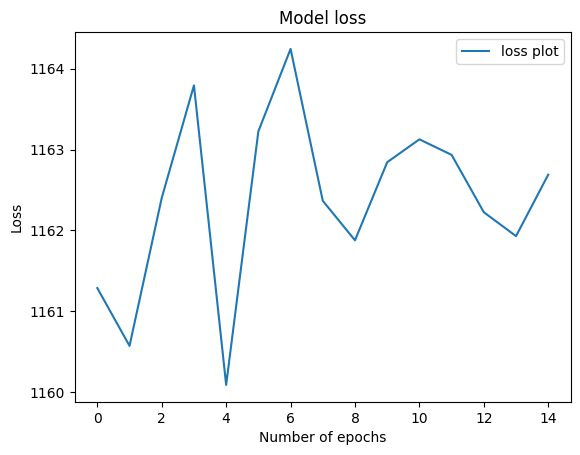

dict_keys(['loss', 'mae'])


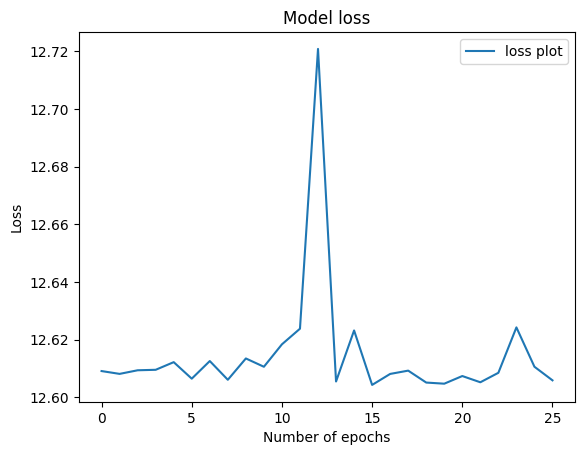

dict_keys(['loss', 'mae'])


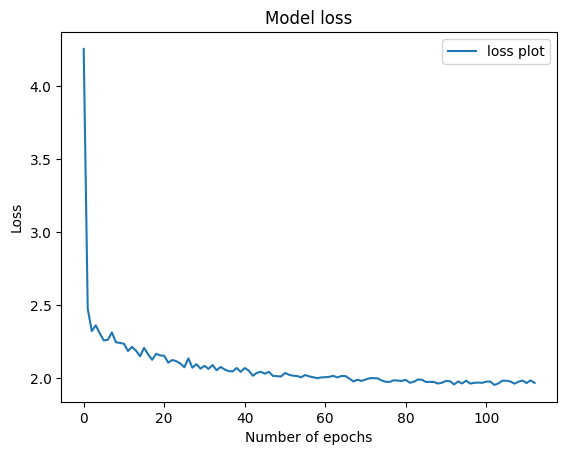

dict_keys(['loss', 'mae'])


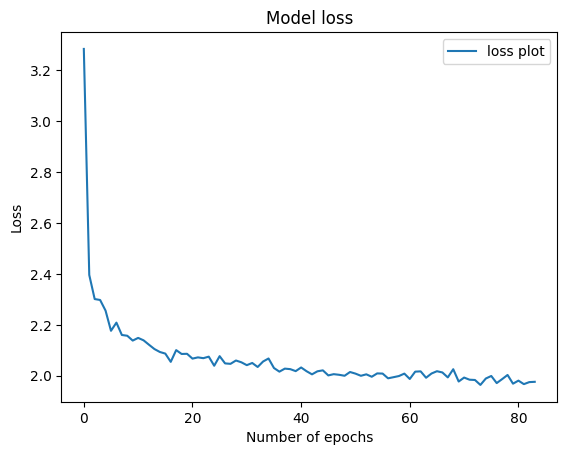

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
Mean Absolute Error (MAE): 1527.9234594797379
Mean Squared Error (MSE): 2360849.9373239297
Root Mean Squared Error (RMSE): 1536.5057557080384
R² score: -1915.652398253369
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
Mean Absolute Error (MAE): 11.7851148996775
Mean Squared Error (MSE): 1274.2499115252058
Root Mean Squared Error (RMSE): 35.69663725794358
R² score: -0.03449783499044301
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
Mean Absolute Error (MAE): 1.8809437849103021
Mean Squared Error (MSE): 8.359284279633702
Root Mean Squared Error (RMSE): 2.891242687778683
R² score: 0.9932135278871631
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Mean Absolute Error (MAE): 1.849003873341342
Mean Squared Error (MSE): 7.834962866926732
Root Mean Squared Error (RMSE): 2.7991003674264223
R² score: 0.9936391974213562


{'MAE': 1.849003873341342,
 'MSE': 7.834962866926732,
 'RMSE': 2.7991003674264223,
 'R2': 0.9936391974213562}

In [32]:
visualize_model(history4)
visualize_model(history5)
visualize_model(history6)
visualize_model(history7)



evaluate_regression_model(model4, X_test, y_test)
evaluate_regression_model(model5, X_test, y_test)
evaluate_regression_model(model6, X_test, y_test)
evaluate_regression_model(model7, X_test, y_test)

In [33]:
#Let's make predictions on our test data
y_preds4=model4.predict(X_test).flatten()
y_preds5=model5.predict(X_test).flatten()
y_preds6=model6.predict(X_test).flatten()
y_preds7=model7.predict(X_test).flatten()

print(y_preds4)
print(y_preds5)
print(y_preds6)
print(y_preds7)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
[-1281.614  -1457.3756 -1415.3861 ... -1633.8524 -1382.1589 -1380.5051]
[12.272491 12.272491 12.272491 ... 12.272491 12.272491 12.272491]
[ 3.2372704  24.24825     4.3203764  ...  1.5424196   0.14313734
 10.107085  ]
[ 3.3689475  24.61996     4.4775777  ...  1.1770742   0.06606333
 10.285076  ]


In [40]:
#Let's make a DataFrame to compare our prediction with the ground truth
df_predictions = pd.DataFrame({'Ground_Truth': y_test,
                               'Model_prediction': y_preds7},
                                columns=['Ground_Truth', 'Model_prediction']) 
df_predictions[
    'Model_prediction']= df_predictions[
    'Model_prediction'].astype(int)

df_predictions.sample(10)

# Seems like model 7 is the best so far
model7.save('pm10-predictor.h5')

In [64]:
# Function to predict PM10 values using the test set
def predict_pm10_from_test(df_test):
    # Drop the target column if present and ensure the structure matches the training data
    if 'pm10' in df_test.columns:
        df_test = df_test.drop(columns=['pm10'])
    
    # Ensure all columns in the test set match the training set
    missing_cols = set(X.columns) - set(df_test.columns)
    for c in missing_cols:
        df_test[c] = X[c].mean()  # Fill missing columns with mean values from training data
    
    # Ensure the order of columns in the test set matches the training set
    df_test = df_test[X.columns]
    
    # Convert boolean columns to float
    df_test = df_test * 1.0  # Converts True/False to 1.0/0.0
    
    # Ensure all data is numeric and handle NaN values
    df_test = df_test.apply(pd.to_numeric, errors='coerce')
    df_test = df_test.dropna()  # Drop rows with NaN values
    
    # Predict PM10 values
    predictions = model.predict(df_test).flatten()
    
    # Create a DataFrame for predictions
    df_predictions = pd.DataFrame({'Predicted_PM10': predictions})
    
    return df_predictions

# Example usage with X_test (your test set)
df_test_predictions = predict_pm10_from_test(X_test)
print(df_test_predictions)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
      Predicted_PM10
0           3.107791
1          24.489622
2           4.111675
3          11.220658
4           4.111675
...              ...
5511        5.207080
5512        7.613408
5513        0.950577
5514       -0.044473
5515       10.015068

[5516 rows x 1 columns]


# Predict pm10 from 2_5 and viceversa

In [70]:
# Predict values
def predict_pm(pmvalue, model):
    # Create a DataFrame with one column for pm2_5
    pmdf = pd.DataFrame({'pm': [pmvalue]})

    # Ensure the DataFrame is numeric
    pmdf = pmdf.apply(pd.to_numeric, errors='coerce')

    # Predict and return the PM10 value
    return model.predict(pmdf)[0][0]

In [71]:
# Assuming df_filtered is your DataFrame and it contains 'pm2_5' and 'pm10' columns
# Separate features and target
X = df_filtered[['pm2_5']]  # Use only the pm2_5 column as feature
y = df_filtered['pm10']  # Target is pm10

# Ensure all data is numeric and handle NaN values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values in X and align y accordingly
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Check shapes of the data
print("Shapes of datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define the modelpm2_5
modelpm2_5 = Sequential([
    Dense(units=64, activation='relu', input_shape=[1]),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

# Compile the modelpm2_5
modelpm2_5.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

# Define early stopping callback
early_stop = EarlyStopping(monitor="loss", patience=10)

# Train the modelpm2_5
historypm2_5 = modelpm2_5.fit(X_train, y_train, epochs=1000, callbacks=[early_stop])

# Evaluate the modelpm2_5
loss, mae = modelpm2_5.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test set: {mae}")

# Example usage:
pm2_5_input = 35.0  # Example PM2.5 value
predicted_pm10 = predict_pm(pm2_5_input, modelpm2_5)
print(f"Predicted PM10 value for PM2.5={pm2_5_input}: {predicted_pm10}")

pm2_5_input = 10.0  # Another example PM2.5 value
predicted_pm10 = predict_pm(pm2_5_input, modelpm2_5)
print(f"Predicted PM10 value for PM2.5={pm2_5_input}: {predicted_pm10}")

pm2_5_input = 50.0  # Another example PM2.5 value
predicted_pm10 = predict_pm(pm2_5_input, modelpm2_5)
print(f"Predicted PM10 value for PM2.5={pm2_5_input}: {predicted_pm10}")


Shapes of datasets:
X_train shape: (22062, 1)
y_train shape: (22062,)
X_test shape: (5516, 1)
y_test shape: (5516,)
Epoch 1/1000


/media/flan/Bodega2T/CodeProjects/PracticeData/Statistics and Machine Learning/.mlenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.6433 - mae: 5.6433
Epoch 2/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8994 - mae: 2.8994
Epoch 3/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4321 - mae: 3.4321
Epoch 4/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0037 - mae: 3.0037
Epoch 5/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0992 - mae: 3.0992
Epoch 6/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4185 - mae: 2.4185
Epoch 7/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5493 - mae: 2.5493
Epoch 8/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4787 - mae: 2.4787
Epoch 9/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3058 - mae: 2.3056
Epoch 10/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7611 - mae: 2.7611
Epoch 11/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.6649 - mae: 2.6649
Epoch 12/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5926 - mae: 2.5926
Epoch 13/1000


In [72]:
# Assuming df_filtered is your DataFrame and it contains 'pm2_5' and 'pm10' columns
# Separate features and target
X = df_filtered[['pm2_5']]  # Use only the pm2_5 column as feature
y = df_filtered['pm10']  # Target is pm10

# Ensure all data is numeric and handle NaN values
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with NaN values in X and align y accordingly
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Check shapes of the data
print("Shapes of datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define the modelpm10
modelpm10 = Sequential([
    Dense(units=64, activation='relu', input_shape=[1]),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

# Compile the modelpm10
modelpm10.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

# Define early stopping callback
early_stop = EarlyStopping(monitor="loss", patience=10)

# Train the modelpm10
historypm_10 = modelpm10.fit(X_train, y_train, epochs=1000, callbacks=[early_stop])

# Evaluate the modelpm10
loss, mae = modelpm10.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test set: {mae}")



# Example usage:
pm10_input = 35.0  # Example PM2.5 value
predicted_pm10 = predict_pm(pm10_input, modelpm10)
print(f"Predicted PM10 value for PM2.5={pm10_input}: {predicted_pm10}")

pm10_input = 10.0  # Another example PM2.5 value
predicted_pm10 = predict_pm(pm10_input, modelpm10)
print(f"Predicted PM10 value for PM2.5={pm10_input}: {predicted_pm10}")

pm10_input = 50.0  # Another example PM2.5 value
predicted_pm10 = predict_pm(pm10_input, modelpm10)
print(f"Predicted PM10 value for PM2.5={pm10_input}: {predicted_pm10}")


Shapes of datasets:
X_train shape: (22062, 1)
y_train shape: (22062,)
X_test shape: (5516, 1)
y_test shape: (5516,)
Epoch 1/1000


/media/flan/Bodega2T/CodeProjects/PracticeData/Statistics and Machine Learning/.mlenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4101 - mae: 4.4101
Epoch 2/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1275 - mae: 3.1275
Epoch 3/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1186 - mae: 3.1186
Epoch 4/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.2368 - mae: 3.2368
Epoch 5/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9234 - mae: 2.9235
Epoch 6/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.6128 - mae: 2.6128
Epoch 7/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.5252 - mae: 3.5252
Epoch 8/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4618 - mae: 2.4618
Epoch 9/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8397 - mae: 2.8397
Epoch 10/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3958 - mae: 2.3958
Epoch 11/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2272 - mae: 2.2272
Epoch 12/1000
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.8388 - mae: 2.8388
Epoch 13/1000


dict_keys(['loss', 'mae'])


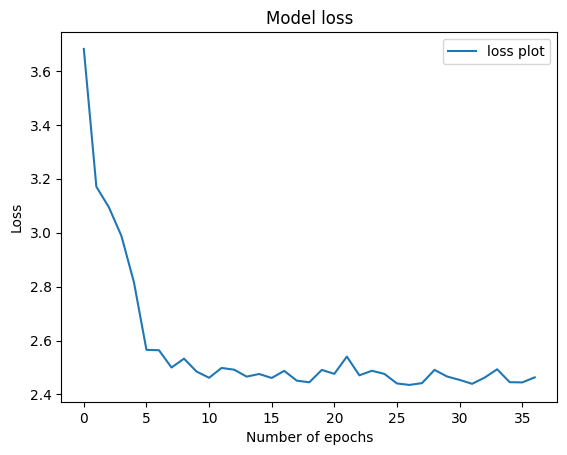

dict_keys(['loss', 'mae'])


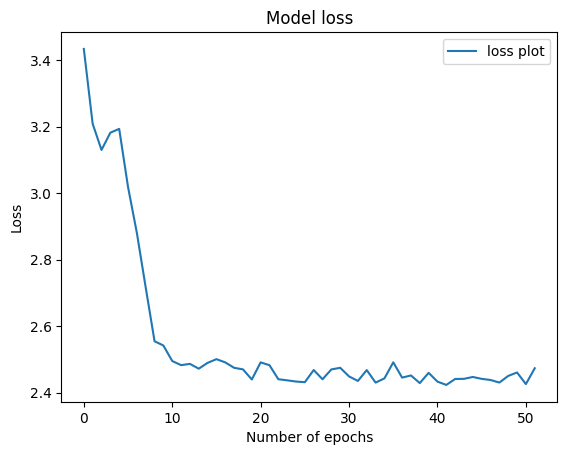

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
Mean Absolute Error (MAE): 2.2914707241735224
Mean Squared Error (MSE): 321.6905152862273
Root Mean Squared Error (RMSE): 17.935732917453564
R² score: 0.73883604888602
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
Mean Absolute Error (MAE): 2.2601997008556642
Mean Squared Error (MSE): 290.45735858617314
Root Mean Squared Error (RMSE): 17.042809586044584
R² score: 0.7641926392172285


{'MAE': 2.2601997008556642,
 'MSE': 290.45735858617314,
 'RMSE': 17.042809586044584,
 'R2': 0.7641926392172285}

In [73]:
visualize_model(historypm2_5)
visualize_model(historypm_10)

evaluate_regression_model(modelpm2_5, X_test, y_test)
evaluate_regression_model(modelpm10, X_test, y_test)